In [0]:
import pandas as pd


from pylift import TransformedOutcome
import numpy as np

from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import math



import matplotlib.pyplot as plt
import subprocess
import sys

from pylift import TransformedOutcome
from pylift.eval import UpliftEval
import random
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics.cluster import contingency_matrix
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [0]:
pd.options.mode.chained_assignment = None

In [0]:
%matplotlib inline

In [0]:
df = pd.read_csv('s3://swiggy-qubole/DS-temp/viswanath/uplift_datasets/criteo-uplift-v2.1.csv.gz')
print(df.shape)
print('\ntreatment distribition:')
print(str(df.treatment.value_counts(normalize=True)))

(13979592, 16)

treatment distribition:
1 0.85
0 0.15
Name: treatment, dtype: float64

In [0]:
df.groupby(['treatment', 'visit']).agg({'visit':[ 'count']})

visit 
 
 
 
 
 count 
 
 
 treatment 
 visit 
 
 
 
 
 
 0 
 0 
 2016832 
 
 
 1 
 80105 
 
 
 1 
 0 
 11305831 
 
 
 1 
 576824

In [0]:
df.groupby(['treatment', 'conversion']).agg({'conversion':[ 'count']})

conversion 
 
 
 
 
 count 
 
 
 treatment 
 conversion 
 
 
 
 
 
 0 
 0 
 2092874 
 
 
 1 
 4063 
 
 
 1 
 0 
 11845944 
 
 
 1 
 36711

In [0]:
features = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11']

In [0]:
df_sample = df.sample(frac=0.5)
df_sample.shape

Out[104]: (6989796, 16)

In [0]:
train_df, test_df = train_test_split(df_sample, test_size=0.5)
train_df.shape, test_df.shape

Out[105]: ((3494898, 16), (3494898, 16))

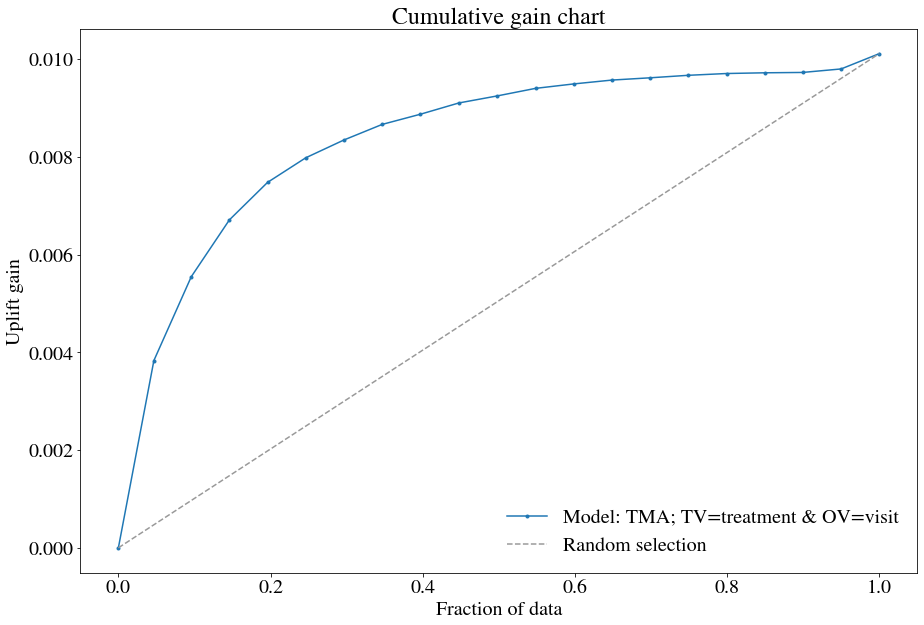

In [0]:
outcomeCol   = 'visit'
treatmentCol = 'treatment'

treated_data    = train_df[train_df[treatmentCol] == True ]
control_data    = train_df[train_df[treatmentCol] == False] 

P_T = GradientBoostingClassifier().fit(treated_data[features], treated_data[outcomeCol] )
P_C = GradientBoostingClassifier().fit(control_data[features], control_data[outcomeCol] )

test_data_val_pred    = P_T.predict_proba( test_df[features] ) 
control_data_val_pred = P_C.predict_proba( test_df[features] )

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) )

upev.plot(plot_type='cgains', label='Model: TMA; TV=treatment & OV=visit')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.083 q2_qini: 0.101 q2_cgains: 0.081

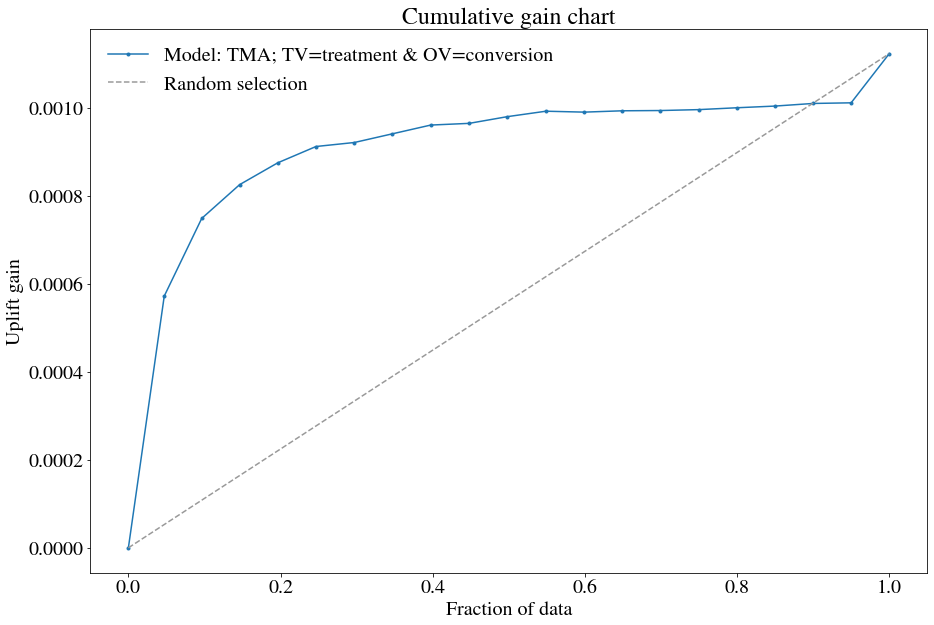

In [0]:
outcomeCol   = 'conversion'
treatmentCol = 'treatment'

treated_data    = train_df[train_df[treatmentCol] == True ]
control_data    = train_df[train_df[treatmentCol] == False] 

P_T = GradientBoostingClassifier().fit(treated_data[features], treated_data[outcomeCol] )
P_C = GradientBoostingClassifier().fit(control_data[features], control_data[outcomeCol] )

test_data_val_pred    = P_T.predict_proba( test_df[features] ) 
control_data_val_pred = P_C.predict_proba( test_df[features] )

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) )

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: TMA; TV=treatment & OV=conversion')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.149 q2_qini: 0.165 q2_cgains: 0.144

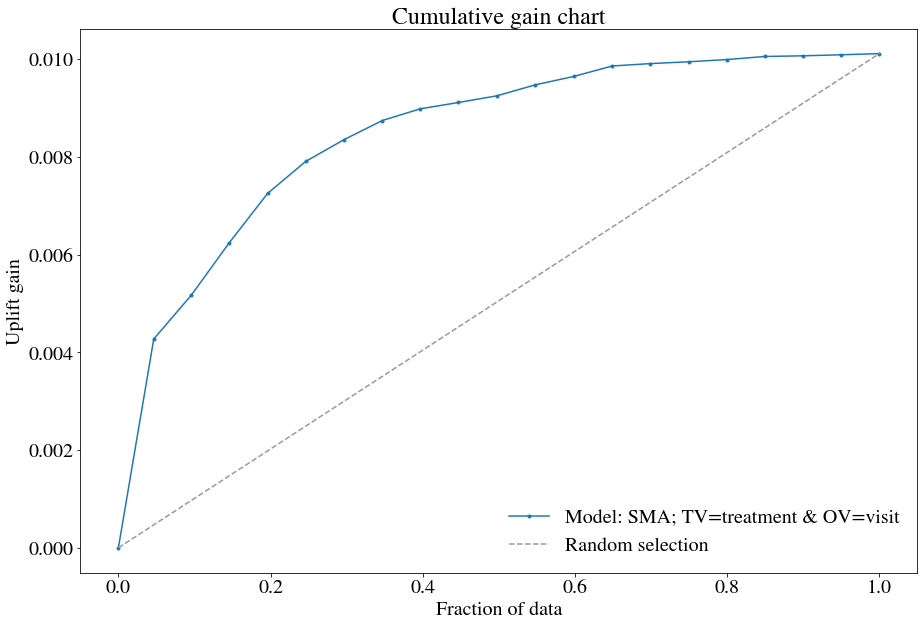

In [0]:
outcomeCol   = 'visit'
treatmentCol = 'treatment'

train_df[f'{treatmentCol}_mod'] = train_df[treatmentCol]
test_df[f'{treatmentCol}_mod']  = test_df[treatmentCol]

propModel = GradientBoostingClassifier().fit(train_df[features + [f'{treatmentCol}_mod']], train_df[outcomeCol] )

test_df[f'{treatmentCol}_mod'] = 1
test_data_val_pred    = propModel.predict_proba( test_df[features + [f'{treatmentCol}_mod']] )
test_df[f'{treatmentCol}_mod'] = 0
control_data_val_pred = propModel.predict_proba( test_df[features + [f'{treatmentCol}_mod']] )

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) )

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: SMA; TV=treatment & OV=visit')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.086 q2_qini: 0.109 q2_cgains: 0.083

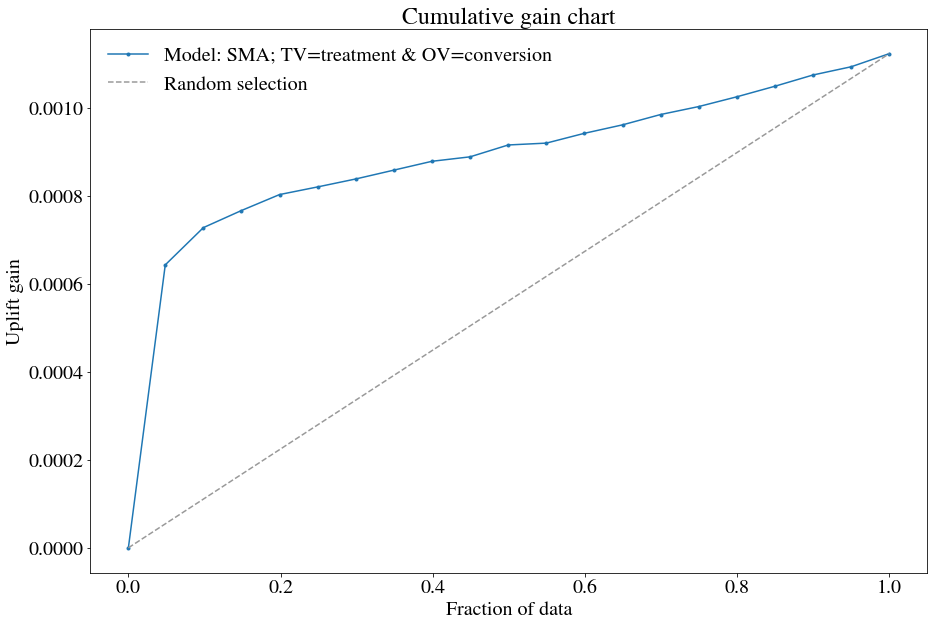

In [0]:
outcomeCol   = 'conversion'
treatmentCol = 'treatment'

train_df[f'{treatmentCol}_mod'] = train_df[treatmentCol]
test_df[f'{treatmentCol}_mod']  = test_df[treatmentCol]

propModel = GradientBoostingClassifier().fit(train_df[features + [f'{treatmentCol}_mod']], train_df[outcomeCol] )

test_df[f'{treatmentCol}_mod'] = 1
test_data_val_pred    = propModel.predict_proba( test_df[features + [f'{treatmentCol}_mod']] )
test_df[f'{treatmentCol}_mod'] = 0
control_data_val_pred = propModel.predict_proba( test_df[features + [f'{treatmentCol}_mod']] )

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], ( test_data_val_pred[:,1] - control_data_val_pred[:,1] ) )

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: SMA; TV=treatment & OV=conversion')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.142 q2_qini: 0.15 q2_cgains: 0.139

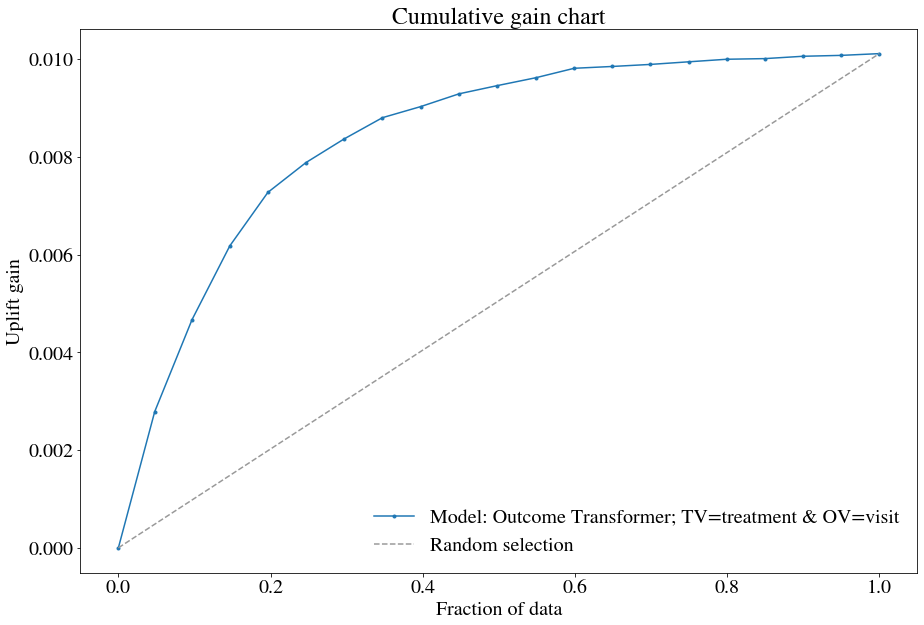

In [0]:
outcomeCol   = 'visit'
treatmentCol = 'treatment'

psModel = GradientBoostingClassifier().fit( train_df[features], train_df[treatmentCol]  )    
propensityScore = psModel.predict_proba( train_df[features] )    
train_df['ps'] = np.where(train_df[treatmentCol] == 1, propensityScore[:,1], propensityScore[:,0])
train_df['y_mod']  = ( 
                        train_df[outcomeCol] * ( train_df[treatmentCol] - train_df['ps']) 
                                   / 
                       ( train_df['ps'] * ( 1-train_df['ps'] ) )
                      )
cateModel = GradientBoostingRegressor().fit(train_df[features], train_df['y_mod'] )

test_df['uplift'] = cateModel.predict( test_df[features] )
upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: Outcome Transformer; TV=treatment & OV=visit')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.082 q2_qini: 0.103 q2_cgains: 0.081

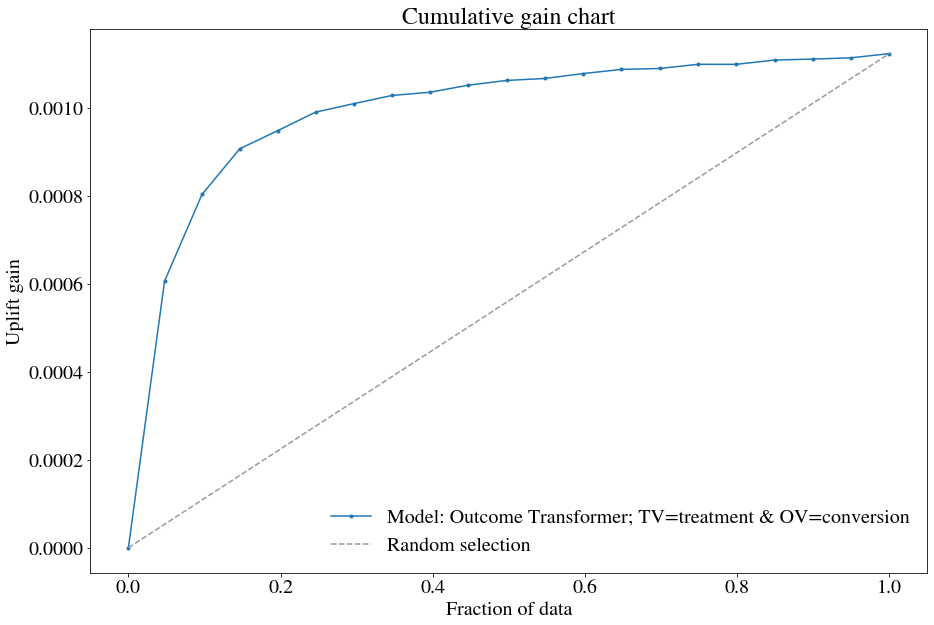

In [0]:
outcomeCol   = 'conversion'
treatmentCol = 'treatment'

psModel = GradientBoostingClassifier().fit( train_df[features], train_df[treatmentCol]  )    
propensityScore = psModel.predict_proba( train_df[features] )    
train_df['ps'] = np.where(train_df[treatmentCol] == 1, propensityScore[:,1], propensityScore[:,0])
train_df['y_mod']  = ( 
                        train_df[outcomeCol] * ( train_df[treatmentCol] - train_df['ps']) 
                                   / 
                       ( train_df['ps'] * ( 1-train_df['ps'] ) )
                      )
cateModel = GradientBoostingRegressor().fit(train_df[features], train_df['y_mod'] )

test_df['uplift'] = cateModel.predict( test_df[features] )
upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: Outcome Transformer; TV=treatment & OV=conversion')

In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.182 q2_qini: 0.205 q2_cgains: 0.176

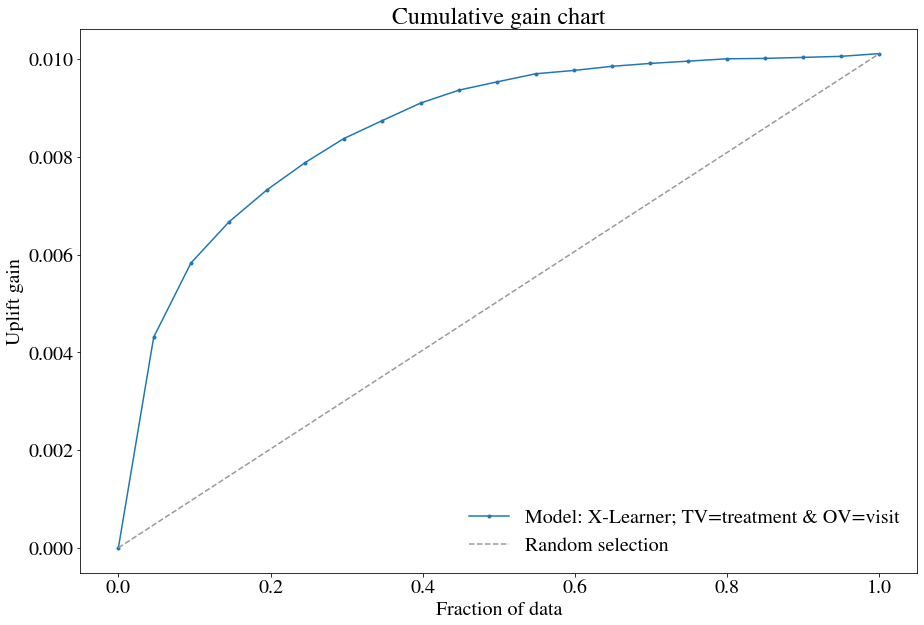

In [0]:
outcomeCol   = 'visit'
treatmentCol = 'treatment'

psModel = GradientBoostingClassifier().fit( train_df[features], train_df[treatmentCol]  )

treated_data    = train_df[train_df.treatment == True ]
control_data    = train_df[train_df.treatment == False] 

T_X = GradientBoostingClassifier().fit(treated_data[features], treated_data[outcomeCol] )
C_X = GradientBoostingClassifier().fit(control_data[features], control_data[outcomeCol] )

treated_data['DT_Y'] = treated_data[outcomeCol] - C_X.predict_proba(treated_data[features])[:,1]
control_data['DC_Y'] = T_X.predict_proba(control_data[features])[:,1] - control_data[outcomeCol]

DT_X = GradientBoostingRegressor().fit(treated_data[features], treated_data['DT_Y'])
DC_X = GradientBoostingRegressor().fit(control_data[features], control_data['DC_Y'])

test_df['uplift'] = ( 
    psModel.predict_proba(test_df[features])[:,1] * DC_X.predict(test_df[features])
                         +
    psModel.predict_proba(test_df[features])[:,0] * DT_X.predict(test_df[features])
)

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: X-Learner; TV=treatment & OV=visit')


In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.088 q2_qini: 0.109 q2_cgains: 0.085

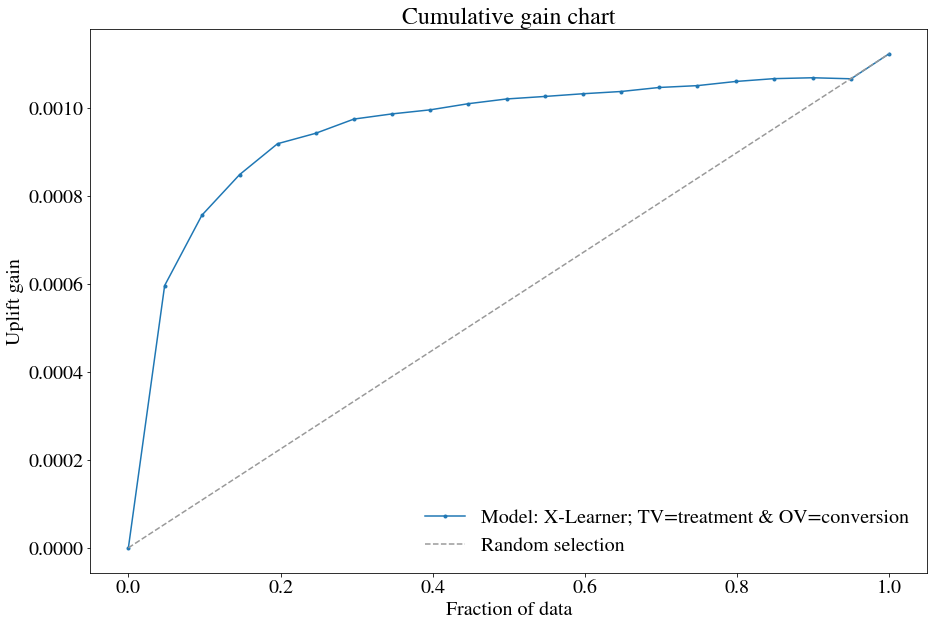

In [0]:
outcomeCol   = 'conversion'
treatmentCol = 'treatment'

psModel = GradientBoostingClassifier().fit( train_df[features], train_df[treatmentCol]  )

treated_data    = train_df[train_df.treatment == True ]
control_data    = train_df[train_df.treatment == False] 

T_X = GradientBoostingClassifier().fit(treated_data[features], treated_data[outcomeCol] )
C_X = GradientBoostingClassifier().fit(control_data[features], control_data[outcomeCol] )

treated_data['DT_Y'] = treated_data[outcomeCol] - C_X.predict_proba(treated_data[features])[:,1]
control_data['DC_Y'] = T_X.predict_proba(control_data[features])[:,1] - control_data[outcomeCol]

DT_X = GradientBoostingRegressor().fit(treated_data[features], treated_data['DT_Y'])
DC_X = GradientBoostingRegressor().fit(control_data[features], control_data['DC_Y'])

test_df['uplift'] = ( 
    psModel.predict_proba(test_df[features])[:,1] * DC_X.predict(test_df[features])
                         +
    psModel.predict_proba(test_df[features])[:,0] * DT_X.predict(test_df[features])
)

upev = UpliftEval(test_df[treatmentCol], test_df[outcomeCol], test_df.uplift)

print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))
upev.plot(plot_type='cgains', label='Model: X-Learner; TV=treatment & OV=conversion')


In [0]:
print('q2_aqini: ', round(upev.q2_aqini,3), 'q2_qini: ', round(upev.q2_qini,3), 'q2_cgains: ', round(upev.q2_cgains,3))

q2_aqini: 0.165 q2_qini: 0.186 q2_cgains: 0.16